In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et
import MathsUtilities as MUte
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

In [2]:
RnLessG = pd.read_pickle('RnLessG.pkl')
fPAR = pd.read_pickle('fPAR.pkl')
Ta = pd.read_pickle('Ta.pkl')
Ed = pd.read_pickle('Ed.pkl')
Ts = pd.read_pickle('Ts.pkl')
WU = pd.read_pickle('WU.pkl')
# Drop the excess irrigation treatments from the oats because they have some drainage in them
RnLessG.loc[:,('Oats','Excess')]= np.nan
fPAR.loc[:,('Oats','Excess')]= np.nan
Ts.loc[:,('Oats','Excess')]= np.nan
WU.loc[:,('Oats','Excess')]= np.nan

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2662: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [3]:
#Create a list of time to exclude where data was missing or irrigation was applied
BarleyNoMeasurementDates = ['2014-12-26','2014-12-27','2014-12-28']
BarleyIrrigationDates = ['2014-11-11','2014-11-18','2014-11-26','2014-12-02','2014-12-10','2014-12-16',
                    '2014-12-23','2014-12-30','2015-01-06','2015-01-13','2015-01-14']
WheatIrrigationDates = ['2015-11-26', '2016-01-21', '2016-01-07', '2015-11-12',
                         '2015-12-24', '2015-11-19', '2015-12-17', '2016-02-04',
                         '2015-11-06', '2015-12-31', '2015-10-13', '2015-11-02',
                         '2016-01-14', '2015-10-29', '2015-12-03', '2015-10-30',
                         '2015-12-10', '2016-02-03']
FodderBeetIrrigationDates = ['2017-01-18',
                             '2017-03-08', '2017-03-01', '2017-05-30', '2017-01-25',
                             '2016-11-23', '2016-12-07', '2017-05-26', '2017-05-25',
                             '2017-02-01', '2017-02-08', '2017-03-22', '2017-02-22',
                             '2016-12-29', '2017-04-27', '2017-01-04', '2016-11-16',
                             '2017-04-12', '2017-02-15', '2017-05-29', '2017-01-11',
                             '2016-12-21']
OatsIrrigationDates = ['2017-12-06', '2017-12-13', '2017-09-13', '2017-11-22',
                        '2017-10-11', '2017-09-12', '2017-09-11', '2017-10-10',
                        '2017-10-12', '2017-08-28', '2017-11-06', '2017-11-29',
                        '2017-11-15']
LandPExclusionDates = ['2013-05-08', '2013-06-26']
ExclusionDates = pd.to_datetime(BarleyIrrigationDates + \
                 WheatIrrigationDates + \
                 FodderBeetIrrigationDates + \
                 OatsIrrigationDates + \
                 BarleyNoMeasurementDates + \
                 LandPExclusionDates)

WUUseDates = [x not in ExclusionDates for x in WU.index]
WU = WU.loc[WUUseDates,:]

In [4]:
CommonDates = []
with open('CommonDates.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        CommonDates.append(currentPlace)
CommonDates = pd.to_datetime(CommonDates)

In [5]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
Crops.sort()
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

FodderBeetGPs = GH.SetGraphicsPatterns(Ts.FodderBeet.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LucerneGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

RyegrassGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

OatsGPs = GH.SetGraphicsPatterns(Ts.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['purple','green','orange'])
BarleyGPs = GH.SetGraphicsPatterns(Ts.Barley.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['blue','red'])

Irrigation
['Irrigated', 'Dryland']
Nitrogen
['50', '250', '0']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[1, 1, 1, 0, 0, 0], [2, 1, 0, 2, 1, 0]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Irrigated 50    -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          0     -  purple  0.15   o  purple
Dryland   50   --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          0    --  purple  0.45   ^   white
Irrigation
['Irrigated', 'Dryland']
Nitrogen
['50', '0', '300']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[1, 1, 1, 0, 0, 0], [2, 0, 1, 2, 0, 1]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

## Function to calculate WU for each crop for a given set of Parameters

In [8]:
def CoverFactor(fPAR,s,k):
    CoverFact = 0.1+s*fPAR
    if CoverFact > k:
        CoverFact = k
    return CoverFact

#Calculate alpha
def AlphaCoeff(Td,fPAR,p,q,s,k):
    Td = max(Td,-2.5)
    CoverFact = CoverFactor(fPAR,s,k)
    return p * np.exp(Td*-q) * CoverFact

def CalcE(p,q,m,s,k):    
    Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in Td.columns:
        Td.loc[:,plot] = (Ts.loc[CommonDates,plot] \
        + Ed.loc[CommonDates,('Expt','Expt','Expt')].values \
        * m )\
        - Ta.loc[CommonDates,('Expt','Expt','Expt')].values       

    Alpha = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in Alpha.columns:
        Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                       fPAR.loc[x,plot],p,q,s,k) for x in Alpha.index]

    #Estimate Water Use by surfaces 
    E = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in E.columns:
        E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                             Ta.loc[x,('Expt','Expt','Expt')],
                                             Alpha.loc[x,plot],
                                             'net') for x in E.index]
    return E

In [9]:
def CalcFits(p,q,m,s,k,E,Results):
    MeanPeriodE = WU.copy()
    MeanPeriodE.loc[:,:] = np.nan
    GH.SortFrame(MeanPeriodE)
    MeanE = E.groupby(level = ['Crop','Irrigation','Nitrogen'],axis=1).mean()
    GH.SortFrame(MeanE)
    for c in Crops:
        F1 = WU.loc[:,c].columns.get_level_values(0).name
        F2 = WU.loc[:,c].columns.get_level_values(1).name
        MeanWU = WU.loc[:,c].groupby(level=[F1,F2],axis=1).mean()
        Dates = MeanWU.dropna(how='all').index
        MeanPeriodE = MeanWU.copy()
        MeanPeriodE.loc[:,:] = np.nan
        GH.SortFrame(MeanPeriodE)
        for d in range(1,len(Dates)):
            for plot in MeanPeriodE.columns:
                MeanPeriodE.loc[Dates[d],plot] = MeanE.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(c,plot[0],plot[1])].mean()        
        Y = MeanPeriodE.iloc[1:,:].stack().stack()
        X = -1 * MeanWU.stack().stack().reindex(Y.index)
        RegStats = MUte.MathUtilities.CalcRegressionStats('ET',Y,X)
        Results.loc[(c,p,q,m,s,k),'NSE'] = RegStats.NSE
        Results.loc[(c,p,q,m,s,k),'R2'] = RegStats.R2
        Results.loc[(c,p,q,m,s,k),'RMSE'] = RegStats.RMSE
        Results.loc[(c,p,q,m,s,k),'ME'] = RegStats.ME

In [10]:
Base = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s','k']))
BaseE = CalcE(1.3,0.13,1.0,1.6,1.0)
CalcFits(1.3,0.13,1.0,1.6,1.0,BaseE,Base)

In [11]:
Base

,,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,k,,,,
Barley,1.3,0.13,1.0,1.6,1.0,0.822646,0.884565,1.243178,-0.587432
FodderBeet,1.3,0.13,1.0,1.6,1.0,0.766456,0.767405,0.760876,0.043604
Lucerne,1.3,0.13,1.0,1.6,1.0,0.486074,0.689790,0.972948,0.470658
Oats,1.3,0.13,1.0,1.6,1.0,0.613660,0.734938,1.286899,0.649271
Ryegrass,1.3,0.13,1.0,1.6,1.0,0.486015,0.592023,0.878396,0.349079
Wheat,1.3,0.13,1.0,1.6,1.0,0.761216,0.805838,0.766012,0.070997


In [12]:
def ObsPredPlot(PredE):
    pos =  1
    for crop in Crops:
            ax = Graph.add_subplot(2,3,pos)
            F1 = WU.loc[:,crop].columns.get_level_values(0).name
            F2 = WU.loc[:,crop].columns.get_level_values(1).name
            MeanWU = WU.loc[:,crop].groupby(level=[F1,F2],axis=1).mean()
            MeanE = PredE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean()
            Dates = MeanWU.dropna(how='all').index
            MeanPeriodE = MeanWU.copy()
            MeanPeriodE.loc[:,:] = np.nan
            GH.SortFrame(MeanPeriodE)
            for d in range(1,len(Dates)):
                for plot in MeanPeriodE.columns:
                    MeanPeriodE.loc[Dates[d],plot] = MeanE.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(plot[0],plot[1])].mean()        
            X = MeanPeriodE.iloc[1:,:]
            Y = -1 * MeanWU.reindex(X.index)
            GH.AddIndexedXY(X,Y,
                            ax,globals()[crop+'GPs'], 10)
            GH.SetAxProps(crop,25,'$ET_{WB}$, (mm/d)','$ET_{MPT}$ (mm/d)',26,25)
            GH.AddLegend(2,16,"")
            X = MeanPeriodE.iloc[1:,:].stack().stack()
            Y = -1 * MeanWU.stack().stack().reindex(X.index)

            RegStats = MUte.MathUtilities.CalcRegressionStats('ET',X,Y)
            Xs = []
            Xs.append(X.min())
            Xs.append(X.max())
            Ys = []
            Ys.append(RegStats.Intercept + Xs[0]*RegStats.Slope)
            Ys.append(RegStats.Intercept + Xs[1]*RegStats.Slope)
            plt.plot([0,13],[0,13],'-', linewidth = 3, color='k')
            fitR2 = r'$R^2$ = ' + str(RegStats.R2)[:4]\
                + '\n$Bias$ = ' + str(RegStats.ME)[:4] + ' mm' \
                + '\n$RMSE$ = ' + str(RegStats.RMSE)[:4] + ' mm'\
                + '\n$NSE$ = ' + str(RegStats.NSE)[:4] +''
            plt.text(.5,.05,fitR2,fontsize=16,transform=ax.transAxes)

            pos +=1
    plt.tight_layout() 

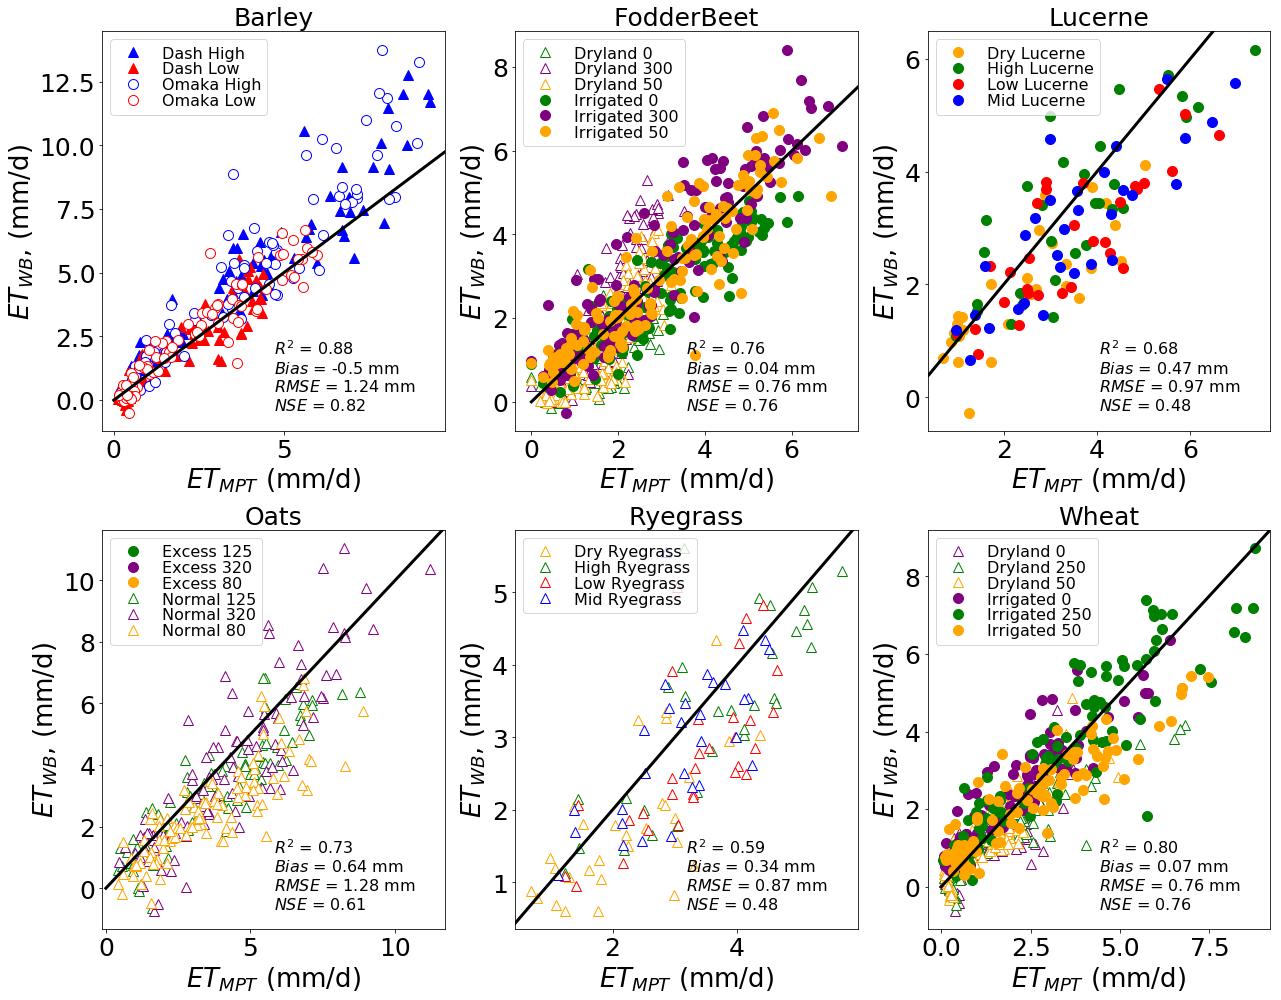

In [13]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(BaseE)

In [39]:
OptFits = pd.read_pickle('5Parm.pkl')

In [40]:
Ranks = pd.DataFrame(index = OptFits.loc['Barley',:].index)
for c in Crops:
    cRanks = pd.DataFrame(index = OptFits.loc[c,'NSE'].sort_values(ascending=False).index)
    cRanks.loc[:,'Rank'] = range(cRanks.index.size)
    Ranks.loc[:,c] = cRanks.loc[:,'Rank']
Ranks.loc[:,'Mean'] = Ranks.mean(axis=1)
Ranks.loc[:,'Max'] = Ranks.max(axis=1)
BestComb = Ranks.loc[:,'Max'].sort_values().index[0]
print(BestComb)
Best = list(Ranks.loc[:,'Mean'].sort_values().index[0])
print(Best)
Ranks = Ranks.sort_values('Mean')

(0.86376953125, 0.11252929687500002, 1.2919921875, 2.28017578125, 1.47373046875)
[0.78251953125, 0.094755859375, 0.1494140625, 1.86181640625, 1.31123046875]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


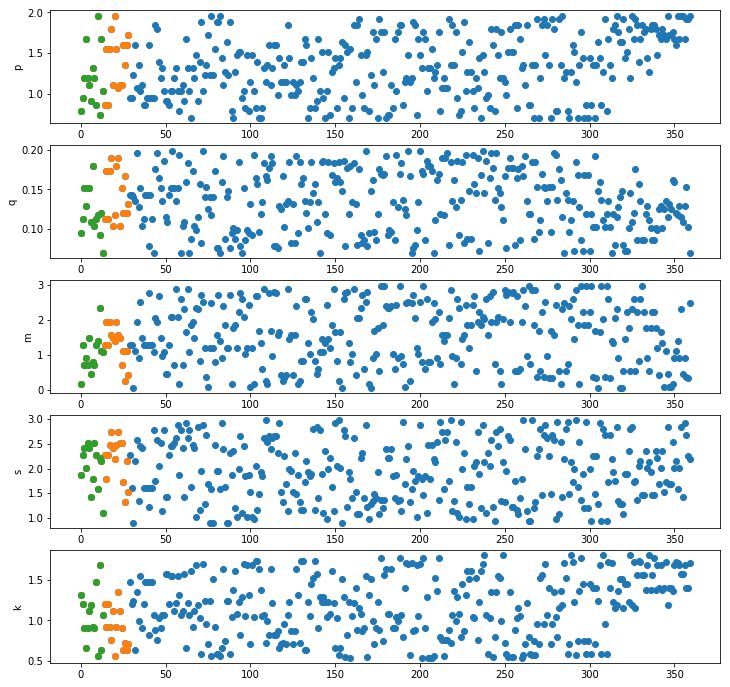

In [42]:
Graph = plt.figure(figsize=(12,12))
pos=1
for par in ['p','q','m','s','k']:
    ax = Graph.add_subplot(5,1,pos)
    plt.plot(range(Ranks.index.size),Ranks.index.get_level_values(par),'o')
    plt.plot(range(Ranks.index.size)[0:29],Ranks.index.get_level_values(par)[0:29],'o')
    plt.plot(range(Ranks.index.size)[0:14],Ranks.index.get_level_values(par)[0:14],'o')
    plt.ylabel(par)
    pos+=1
Graph.savefig('ParamSensitivityVsRank.jpg',dpi=400)

### Lets look at selecting a param combination with m close to 2 to better match the report by Alves

In [43]:
TenthPercentile = Ranks.iloc[0:29,:]
Selections = TenthPercentile.loc[TenthPercentile.index.get_level_values('m')>1.9,:]


In [44]:
Selections

Barley  FodderBeet  Lucerne  \
p        q        m        s        k                                       
0.741895 0.092217 2.323242 2.214551 1.676855     139          22       11   
1.554395 0.173467 1.948242 1.796191 0.915137     104          70       47   
                           2.477051 0.915137      98          65       51   
         0.180068 1.948242 2.477051 0.915137     108          79       46   

                                              Oats  Ryegrass  Wheat  \
p        q        m        s        k                                 
0.741895 0.092217 2.323242 2.214551 1.676855    54         6     21   
1.554395 0.173467 1.948242 1.796191 0.915137    40        13      3   
                           2.477051 0.915137    51        16      0   
         0.180068 1.948242 2.477051 0.915137    44        19      1   

                                                   Mean    Max  
p        q        m        s        k                           
0.741895 0.092217 2.323242 2.214551 1.676855  42.166667  139.0  
1.554395 0.173467 1.948242 1.796191 0.915137  46.166667  104.0  
                           2.477051 0.915137  46.833333   98.0  
         0.180068 1.948242 2.477051 0.915137  49.500000  108.0

Lets chose the third set (index pos = 2) as it allows a value of m > 2 and a lower s

In [51]:
list(Selections.index[0])

[0.7418945312499999,
 0.092216796875,
 2.3232421875,
 2.2145507812500003,
 1.6768554687500001]

In [52]:
Selected = list(Selections.index[0])
SelectedDF = pd.DataFrame(index=['p','q','m','s','k'],data=Selected)

In [60]:
OptFits.loc[c,'NSE'].loc[Selected[0]].loc[Selected[1]].loc[Selected[2]].loc[Selected[3]].loc[Selected[4]]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


0.6603977016104305

### Now we have three was of selecting param sets:
- The values fitted to the barley
- The values that give the best overall statistics
- The values that allow a s ~ 2 to better reconcile with Alves

Graph these agianst the rest of the fitting space to see how they look

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':


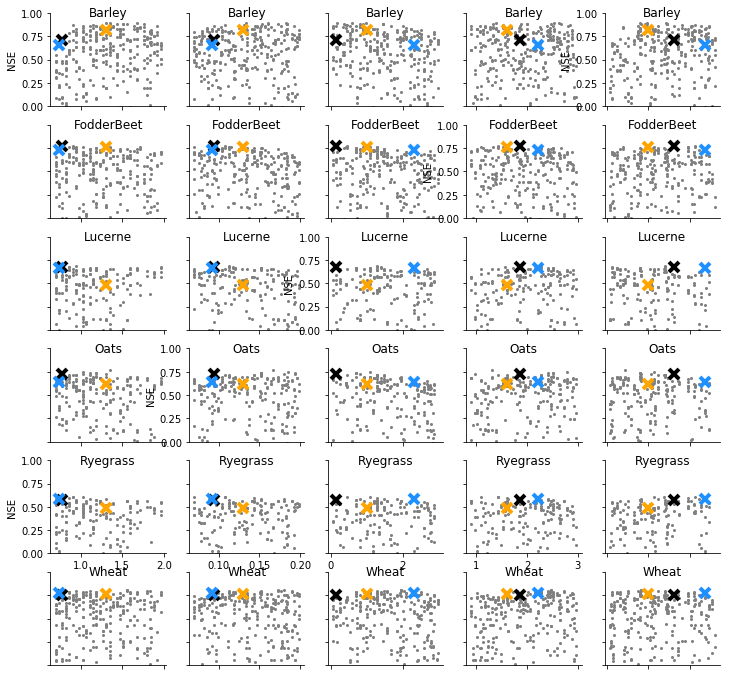

In [62]:
Graph = plt.figure(figsize=(12,12))
cols = ['yellow','blue','darkgreen','red','lightgreen','orange']
pos=1
for c in Crops:
    colpos = 0
    for par in ['p','q','m','s','k']:
        ax = Graph.add_subplot(6,5,pos)
        plt.plot(OptFits.loc[c,par],OptFits.loc[c,'NSE'],'o',ms=2,color='grey')
        plt.plot(Base.index.get_level_values(par).drop_duplicates(),Base.loc[c,'NSE'],'x',color='orange',markersize=10,mew=4)
        plt.plot(Ranks.loc[:,'Mean'].index.get_level_values(par)[0],
            OptFits.loc[(c,Best[0]),:].loc[Best[1],:].loc[Best[2],:].loc[Best[3],Best[4],:].NSE,'x',color='k',markersize=10,mew=4)
        plt.plot(SelectedDF.loc[par],OptFits.loc[c,'NSE'].loc[Selected[0]].loc[Selected[1]].loc[Selected[2]].loc[Selected[3]].loc[Selected[4]],'x',color='dodgerblue',markersize=10,mew=4)
        plt.title(c,y=0.9)
        plt.ylim(0,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False,labelsize=10)
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False,labelsize=10)
        if pos in [1,5,9,13,17,21]:
            plt.ylabel('NSE')
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True,labelsize=10)
        if pos in range(21,25):
            plt.xlabel(par)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
        pos+=1
        colpos+=1

Graph.savefig('ParamSensitivity.jpg',dpi=400)

In [94]:
Select = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s']))
SelectE = CalcE(Selected[0],Selected[1],Selected[2],Selected[3])
CalcFits(Selected[0],Selected[1],Selected[2],Selected[3],SelectE,Select)

In [95]:
Select

,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,,,,
Barley,1.27002,0.111006,2.187012,1.279395,0.664989,0.833376,1.708606,-0.978322
FodderBeet,1.27002,0.111006,2.187012,1.279395,0.711702,0.740706,0.845377,-0.214923
Lucerne,1.27002,0.111006,2.187012,1.279395,0.656350,0.674666,0.795605,0.049660
Oats,1.27002,0.111006,2.187012,1.279395,0.658746,0.666769,1.209479,0.168153
Ryegrass,1.27002,0.111006,2.187012,1.279395,0.592509,0.594731,0.782121,0.005950
Wheat,1.27002,0.111006,2.187012,1.279395,0.779614,0.801709,0.735911,-0.229771


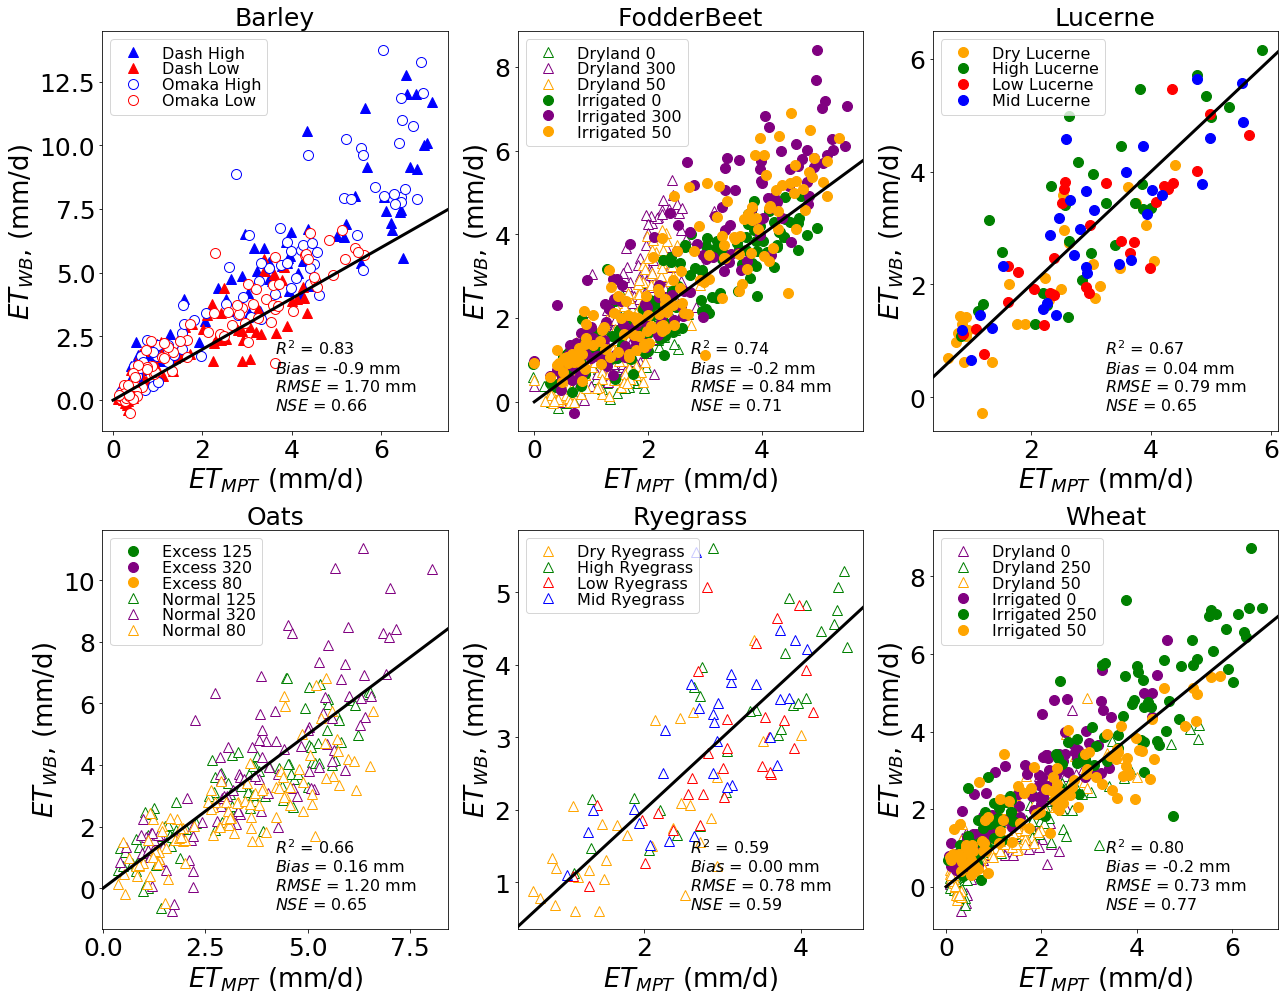

In [97]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(SelectE)

In [65]:
Bestt = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s','k']))
BestE = CalcE(Best[0],Best[1],Best[2],Best[3],Best[4])
CalcFits(Best[0],Best[1],Best[2],Best[3],Best[4],BestE,Bestt)

In [66]:
Bestt

,,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,k,,,,
Barley,0.78252,0.094756,0.149414,1.861816,1.31123,0.711577,0.865119,1.585359,-0.936350
FodderBeet,0.78252,0.094756,0.149414,1.861816,1.31123,0.770876,0.782242,0.753642,-0.152814
Lucerne,0.78252,0.094756,0.149414,1.861816,1.31123,0.672776,0.685795,0.776358,0.021304
Oats,0.78252,0.094756,0.149414,1.861816,1.31123,0.721032,0.724045,1.093544,0.069119
Ryegrass,0.78252,0.094756,0.149414,1.861816,1.31123,0.570946,0.582211,0.802548,0.038523
Wheat,0.78252,0.094756,0.149414,1.861816,1.31123,0.758896,0.781898,0.769724,-0.140346


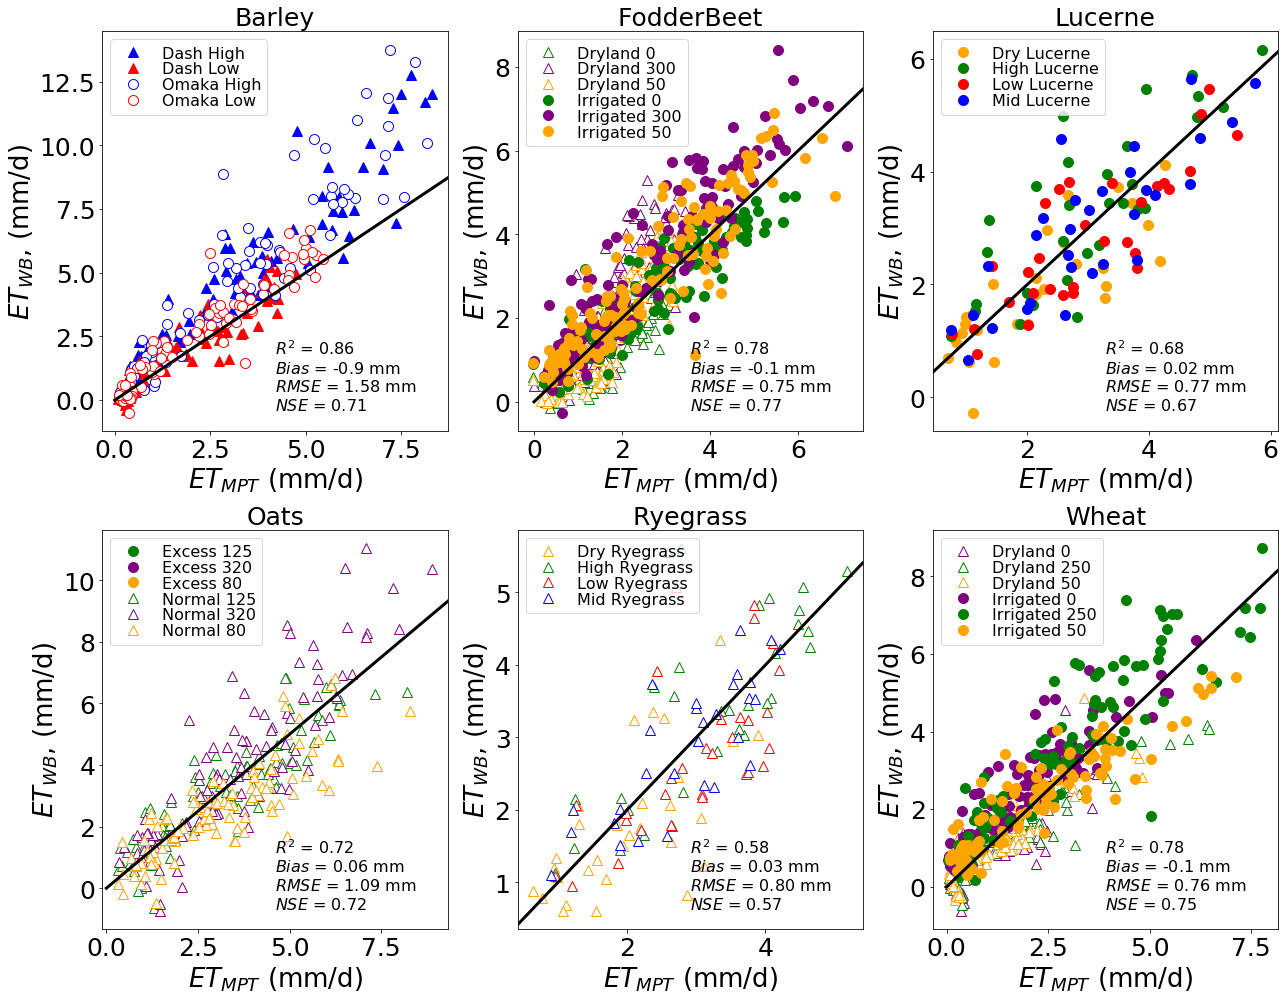

In [67]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(BestE)
Graph.savefig('ObsPredBestFits.jpg',dpi=400)

## Create range of parameters to sample

In [33]:
problem = {'num_vars': 5,'names': ['p', 'q', 'm','s','k'],
    'bounds': [[0.7, 2.0],[0.07, 0.2],[0.0, 3.0],[0.9,3],[0.5,1.8]]}

# Generate samples
param_values = saltelli.sample(problem, 30,calc_second_order=True)
SampleRange = pd.DataFrame(data=param_values,columns = ['p', 'q', 'm','s','k'] )
SampleRange

,p,q,m,s,k
0,0.985645,0.082568,1.555664,2.321191,0.864355
1,1.879395,0.082568,1.555664,2.321191,0.864355
2,0.985645,0.075967,1.555664,2.321191,0.864355
3,0.985645,0.082568,2.698242,2.321191,0.864355
4,0.985645,0.082568,1.555664,1.952051,0.864355
5,0.985645,0.082568,1.555664,2.321191,0.590137
6,0.985645,0.075967,2.698242,1.952051,0.590137
7,1.879395,0.082568,2.698242,1.952051,0.590137
8,1.879395,0.075967,1.555664,1.952051,0.590137
9,1.879395,0.075967,2.698242,2.321191,0.590137


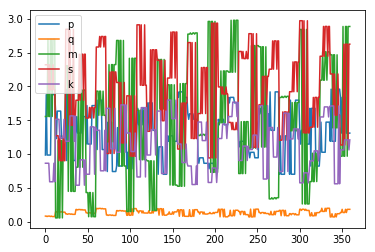

In [34]:
SampleRange.plot()

## Make some graphs of parameter ranges

In [18]:
EBMeans = pd.read_pickle('C:/GitHubRepos/CropWaterAnalysis/General/WaterUseEstimates/barleyData.pkl')
Irrigations = ['Low','Mid','High']
Cultivars = ['Dash','Omaka']
EBMeans.loc[:,'AresidRel'] = EBMeans.loc[:,'AresidRel'] * 0.9 # This is reduced downward because I changed the calculation for upward flux between this paper and the first paper where the model coefficients for barley were fitted.  This changes the fits so to make the fits look correct I adjust this factor

In [19]:
def plotBarley(Xvar,Yvar,CoverThreshold):
    Colors = ['red', 'green', 'blue']
    Markerfills = ['white','white','white','red', 'green', 'blue']
    culpos = 0
    for cul in Cultivars:
        irrpos = 0
        for irr in Irrigations:
            CoverFilter = EBMeans.loc[(cul,irr),'GreenCover'] > CoverThreshold
            Y = EBMeans.loc[(cul,irr),Yvar].loc[CoverFilter] 
            X = EBMeans.loc[(cul,irr),Xvar].loc[CoverFilter]
            plt.plot(X,Y,'o',mec = Colors[irrpos],mfc=Markerfills[culpos],ms=3,mew=1)
            irrpos+=1
            culpos+=1

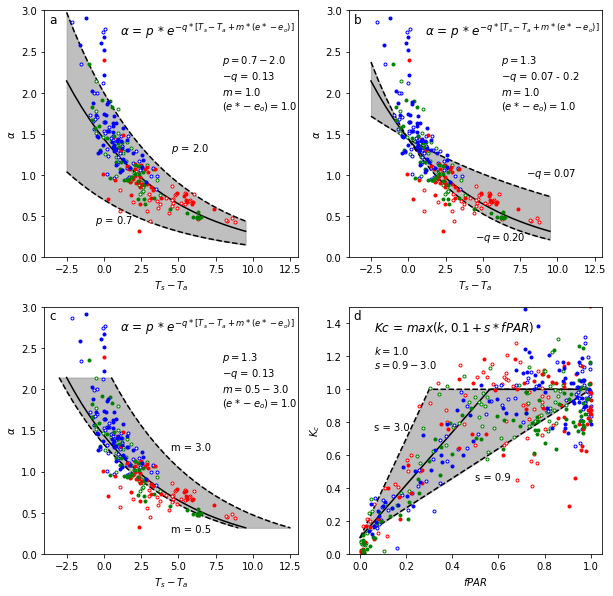

In [28]:
Graph = plt.figure(figsize=(10,10))
xs = np.arange(-2.5,10,0.5)
base, UpperP, LowerP, UpperQ, LowerQ, = [],[],[],[],[]
for x in xs:
    base.append(AlphaCoeff(x,1.0,1.44,0.159,1.6,1.0))
    UpperP.append(AlphaCoeff(x,1.0,2,0.159,1.6,1.0))
    LowerP.append(AlphaCoeff(x,1.0,0.7,0.159,1.6,1.0))
    UpperQ.append(AlphaCoeff(x,1.0,1.44,0.2,1.6,1.0))
    LowerQ.append(AlphaCoeff(x,1.0,1.44,0.07,1.6,1.0))
ax = Graph.add_subplot(2,2,1)
plt.fill_between(xs,UpperP,LowerP,color='grey',alpha=0.5)
plt.plot(xs,UpperP,'--',label='Max p',color='k')
plt.plot(xs,LowerP,'--',label='Min p',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.7,.6,'$p = 0.7 - 2.0$ \n$-q$ = 0.13\n$m = 1.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.43,r'$p$ = 2.0',transform=ax.transAxes)
plt.text(.2,.14,r'$p$ = 0.7',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'a',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,2)
plt.fill_between(xs,UpperQ,LowerQ,color='grey',alpha=0.5)
plt.plot(xs,UpperQ,'--',label='Max q',color='k')
plt.plot(xs,LowerQ,'--',label='Min q',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.6,.6,'$p = 1.3$ \n$-q$ = 0.07 - 0.2\n$m = 1.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.07,r'$-q = 0.20$',transform=ax.transAxes)
plt.text(.7,.33,r'$-q = 0.07$',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'b',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,3)
plt.fill_betweenx(base,xs+3,xs-.5,color='grey',alpha=0.5)
plt.plot(xs+3,base,'--',label='Max m',color='k')
plt.plot(xs-.5,base,'--',label='Min m',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.7,.6,'$p = 1.3$ \n$-q$ = 0.13\n$m = 0.5 - 3.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.09,'m = 0.5',transform=ax.transAxes)
plt.text(.5,.42,'m = 3.0',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'c',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,4)
xs = np.arange(0,1,0.01)
base, UpperS, LowerS, = [],[],[]
for x in xs:
    base.append(CoverFactor(x,1.6,1.0))
    UpperS.append(CoverFactor(x,3,1.0))
    LowerS.append(CoverFactor(x,0.9,1.0))
plt.fill_between(xs,UpperS,LowerS,color='grey',alpha=0.5)
plt.plot(xs,UpperS,'--', label='Max s',color='k')
plt.plot(xs,LowerS,'--',label='Min s',color='k')
plt.plot(xs,base,color='k')
plotBarley('GreenCover','AresidRel',0.0)
#plt.text(.4,.8,'             p = 1.3 \n            -q = 0.07 - 0.2\n        fPAR = 1.0\nm * eo-e* = 1.0',transform=ax.transAxes)
plt.text(.5,.3,'s = 0.9',transform=ax.transAxes)
plt.text(.1,.5,'s = 3.0',transform=ax.transAxes)
plt.ylim(0,1.5)
plt.ylabel(r'$K_c$')
plt.xlabel(r'$fPAR$')
plt.text(.1,.90,r'$Kc$ = $max(k,0.1 + s * fPAR)$' ,transform=ax.transAxes,fontsize=12)
plt.text(.1,.75,'$k = 1.0$\n$s = 0.9 - 3.0$',transform=ax.transAxes)
plt.text(0.02,0.95,'d',transform = ax.transAxes,fontsize=12)

Graph.savefig('BarleyParamFits.jpg',dpi=400)

## Calculate Fits

In [25]:
Danger, running the cells below will recalculate all parameter combinations

SyntaxError: invalid syntax (<ipython-input-25-b2057b2cded2>, line 1)

In [35]:
OptFits = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s','k']))
for comb in SampleRange.index:
    comb = SampleRange.loc[comb,:].values
    Eest = CalcE(comb[0],comb[1],comb[2],comb[3],comb[4])
    CalcFits(comb[0],comb[1],comb[2],comb[3],comb[4],Eest,OptFits)

C:\Anaconda\lib\site-packages\ipykernel\zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


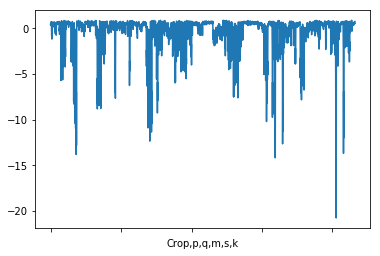

In [36]:
OptFits.NSE.plot()

In [37]:
OptFits.loc[:,'Crop'] = OptFits.index.get_level_values(0)
OptFits.loc[:,'p'] = OptFits.index.get_level_values(1)
OptFits.loc[:,'q'] = OptFits.index.get_level_values(2)
OptFits.loc[:,'m'] = OptFits.index.get_level_values(3)
OptFits.loc[:,'s'] = OptFits.index.get_level_values(4)
OptFits.loc[:,'k'] = OptFits.index.get_level_values(5)

C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py:208: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


In [38]:
OptFits.to_pickle('5Parm.pkl')